# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

## converting columns with less number of unique categorical values to numerical values

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

In [ ]:
mapping = {
    "Internet": 1,
    "Mobile": 2
}

df["sales_channel"] = df["sales_channel"].map(mapping)

In [ ]:
df["sales_channel"].unique()

array([1, 2])

In [ ]:
df[ 'trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [ ]:
mapping = {
    'RoundTrip': 1,
     'CircleTrip': 2,
    'OneWay': 3
}

df[ 'trip_type'] = df[ 'trip_type'].map(mapping)

In [ ]:
df['trip_type'].unique()

array([1, 2, 3])

handling outliers through IQR

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers



In [ ]:
outliers = find_outliers_IQR(df['length_of_stay'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers

number of outliers: 3807
max outlier value: 778
min outlier value: 63


,length_of_stay
18,155
21,88
31,82
41,90
43,84
...,...
25580,63
25581,67
25582,67
25586,63


In [ ]:
outliers = find_outliers_IQR(df['purchase_lead'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers

number of outliers: 3456
max outlier value: 867
min outlier value: 257


,purchase_lead
0,262
9,378
12,265
16,259
19,351
...,...
49955,366
49967,279
49973,333
49975,265


In [ ]:
outliers = find_outliers_IQR(df['flight_duration'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers

number of outliers: 0
max outlier value: nan
min outlier value: nan


,flight_duration


among the columns with numerical values, purchase_lead and length_of_stay has outliers.So, we drop all other columns and apply robust scaler only on them

In [ ]:
X_robust = df.drop(columns=(['num_passengers',	'route',	'booking_origin','sales_channel',	'trip_type',	'flight_hour','flight_day',	'wants_extra_baggage',	'wants_preferred_seat','wants_in_flight_meals','flight_duration','booking_complete']))

In [ ]:
X_robust

,purchase_lead,length_of_stay
0,262,19
1,112,20
2,243,22
3,96,31
4,68,22
...,...,...
49995,27,6
49996,111,6
49997,24,6
49998,15,6


In [ ]:
# Apply Robust Scaler
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X_robust)
X_robust_scaled_df= pd.DataFrame(X_robust_scaled, columns=X_robust.columns)
X_robust_scaled_df

,purchase_lead,length_of_stay
0,2.244681,0.086957
1,0.648936,0.130435
2,2.042553,0.217391
3,0.478723,0.608696
4,0.180851,0.217391
...,...,...
49995,-0.255319,-0.478261
49996,0.638298,-0.478261
49997,-0.287234,-0.478261
49998,-0.382979,-0.478261


In [ ]:
frequency_encoding = df['booking_origin'].value_counts(normalize=False)
df['booking_origin_Frequency_Encoded'] = df['booking_origin'].map(frequency_encoding)


In [ ]:
frequency_encoding = df['route'].value_counts(normalize=False)
df['routes_Frequency_Encoded'] = df['route'].map(frequency_encoding)

In [ ]:
df=df.drop(columns=['route', 'booking_origin'])

In [ ]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_Frequency_Encoded,routes_Frequency_Encoded
0,2,1,1,262,19,7,6,1,0,0,5.52,0,1074,20
1,1,1,1,112,20,3,6,0,0,0,5.52,0,1074,20
2,2,1,1,243,22,17,3,1,1,0,5.52,0,1270,20
3,1,1,1,96,31,4,6,0,0,1,5.52,0,1074,20
4,2,1,1,68,22,15,3,1,0,1,5.52,0,1270,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1,27,6,9,6,1,0,1,5.62,0,17872,221
49996,1,1,1,111,6,4,7,0,0,0,5.62,0,17872,221
49997,1,1,1,24,6,22,6,0,0,1,5.62,0,17872,221
49998,1,1,1,15,6,11,1,1,0,1,5.62,0,17872,221


In [ ]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_Frequency_Encoded,routes_Frequency_Encoded
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,1.112360,1.017800,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560,8737.094720,404.939120
std,1.020165,0.315812,0.181559,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643,7054.684827,591.782184
min,1.000000,1.000000,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000,2369.000000,81.000000
50%,1.000000,1.000000,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000,7174.000000,227.000000
75%,2.000000,1.000000,1.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000,17872.000000,465.000000
max,9.000000,2.000000,3.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000,17872.000000,2680.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

route and booking origin has too many unique categorical values. we can't convert them into numerical values by mapping them to numbers. Hence, we apply frequency encoding to these columns

In [ ]:
X = df.drop('booking_complete', axis=1)
Y = df['booking_complete']

In [ ]:
#missing values
mv_X = X.isnull().sum()

In [ ]:
print('Missing values are :')
print(mv_X)

Missing values are :
num_passengers                      0
sales_channel                       0
trip_type                           0
purchase_lead                       0
length_of_stay                      0
flight_hour                         0
flight_day                          0
wants_extra_baggage                 0
wants_preferred_seat                0
wants_in_flight_meals               0
flight_duration                     0
booking_origin_Frequency_Encoded    0
routes_Frequency_Encoded            0
dtype: int64


In [ ]:
mv_Y = Y.isnull().sum()
print('Missing values are :')
print(mv_Y)

Missing values are :
0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd



# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Fit the model
rf.fit(X_train, Y_train)

# Get feature importance
feature_importances = rf.feature_importances_

# Display feature importance
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')


num_passengers: 0.049129022840309705
sales_channel: 0.010663734668309464
trip_type: 0.0017285312617719042
purchase_lead: 0.19403623950934631
length_of_stay: 0.12704766152018965
flight_hour: 0.14389105668222282
flight_day: 0.09242411296431438
wants_extra_baggage: 0.014089783409614523
wants_preferred_seat: 0.015083421149716494
wants_in_flight_meals: 0.02182938763246396
flight_duration: 0.07320543433221272
booking_origin_Frequency_Encoded: 0.11016137663454216
routes_Frequency_Encoded: 0.146710237394986


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
indices = feature_importances.argsort()[::-1]


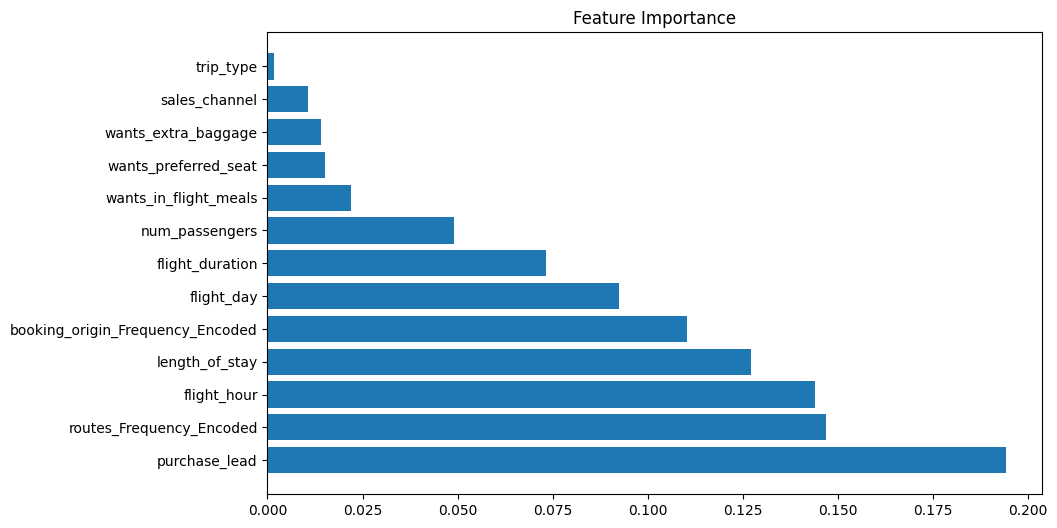

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), feature_importances[indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.show()


In [ ]:
print("Test Accuracy: {}%".format(round(rf.score(X_test,Y_test)*100,2)))

rf_model = RandomForestClassifier()

Test Accuracy: 85.62%


In [ ]:
# Predicting on test data
Y_pred = rf.predict(X_test)

print(Y_pred)


[0 0 0 ... 0 0 0]


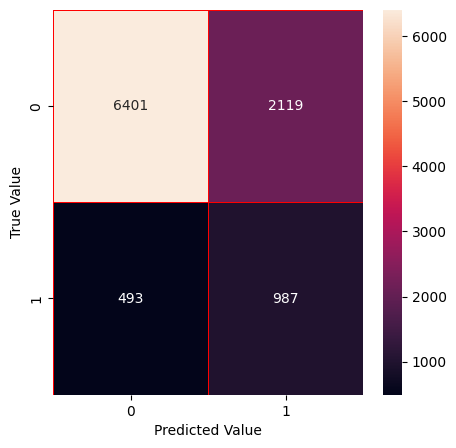

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_true = Y_test
cm = confusion_matrix(Y_true, Y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
from xgboost import XGBClassifier

# Train XGBoost with scale_pos_weight (to address class imbalance)
model = XGBClassifier(scale_pos_weight=len(Y_train[Y_train == 0]) / len(Y_train[Y_train == 1]), random_state=42)
model.fit(X_train, Y_train)

# Predict on test data
Y_pred = model.predict(X_test)

# Evaluate performance
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.93      0.75      0.83      8520
           1       0.32      0.67      0.43      1480

    accuracy                           0.74     10000
   macro avg       0.62      0.71      0.63     10000
weighted avg       0.84      0.74      0.77     10000



<Axes: ylabel='Count'>

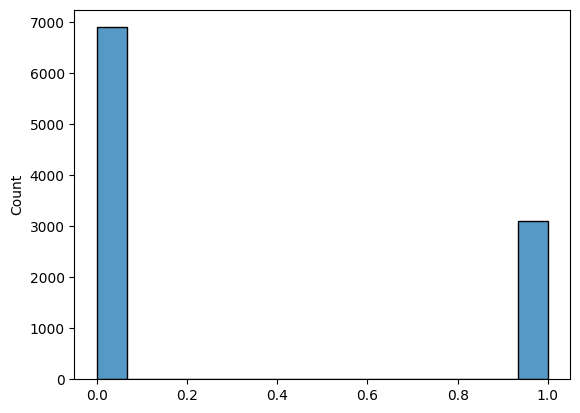

In [ ]:
sns.histplot(Y_pred)